In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

In [2]:
base_dir = r"C:\Users\18138\Desktop\data anly\Training Image sp 23"

In [3]:
subdirs = os.listdir(base_dir)
class_names = sorted(subdirs)
img_size = (224, 224)
batch_size = 32

In [4]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    classes=class_names,
    class_mode='categorical',
    subset='training')

valid_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    classes=class_names,
    class_mode='categorical',
    subset='validation')

Found 1659 images belonging to 16 classes.
Found 179 images belonging to 16 classes.


In [5]:
# Load the pre-trained MobileNet model
base_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(16, activation='softmax')(x)

# Create the new model
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=10)


Epoch 1/10
52/52 [==============================] - 40s 752ms/step - loss: 1.4514 - accuracy: 0.5624 - val_loss: 0.2783 - val_accuracy: 0.9050
Epoch 2/10
52/52 [==============================] - 39s 741ms/step - loss: 0.4175 - accuracy: 0.8662 - val_loss: 0.1994 - val_accuracy: 0.9274
Epoch 3/10
52/52 [==============================] - 38s 736ms/step - loss: 0.2920 - accuracy: 0.9030 - val_loss: 0.1617 - val_accuracy: 0.9553
Epoch 4/10
52/52 [==============================] - 38s 730ms/step - loss: 0.2398 - accuracy: 0.9241 - val_loss: 0.1623 - val_accuracy: 0.9441
Epoch 5/10
52/52 [==============================] - 38s 736ms/step - loss: 0.1723 - accuracy: 0.9433 - val_loss: 0.1534 - val_accuracy: 0.9274
Epoch 6/10
52/52 [==============================] - 38s 738ms/step - loss: 0.1420 - accuracy: 0.9536 - val_loss: 0.1402 - val_accuracy: 0.9497
Epoch 7/10
52/52 [==============================] - 38s 738ms/step - loss: 0.1179 - accuracy: 0.9626 - val_loss: 0.1473 - val_accuracy: 0.9441

In [7]:
loss, accuracy = model.evaluate(valid_generator)

# Print the validation accuracy
print('Validation Accuracy:', accuracy)


6/6 [==============================] - 4s 600ms/step - loss: 0.1389 - accuracy: 0.9553
Validation Accuracy: 0.9553072452545166


In [9]:
test_dir = r"C:\Users\18138\Desktop\data anly\Test Image sp 23"


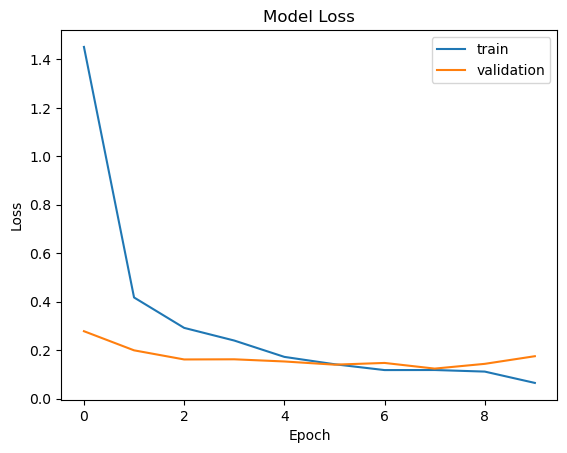

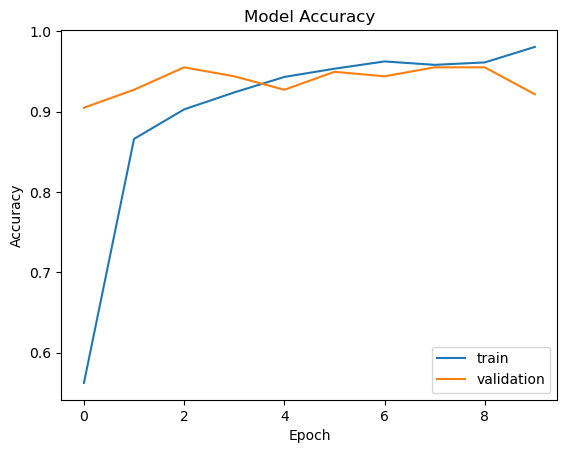

In [10]:
import matplotlib.pyplot as plt

# Plot the normal and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the normal and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
import cv2
#print("---------------------TEST_DATA_READING OF DATA --------------------")

test_clsname = [name for name in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, name))]
#print("---------------------CLASSES --------------------")
#print(f"CLASSES LIST: {test_clsname}")
#print("---------------------LENGTH OF CLASSES --------------------")
#print(len(test_clsname))
img_size = 224
test_data = [] 
label = 0
while label < len(test_clsname):
    category = test_clsname[label]
    print(label)
    print(category)
    #print("---------------------CATEG,LABL --------------------")
    #print(f"CATEGORY:LABELS= {category,label}")
    path = os.path.join(test_dir, category)
    img_name_index = 0
    while img_name_index < len(os.listdir(path)):
        img_name = os.listdir(path)[img_name_index]
        img_path = os.path.join(path, img_name)
        #print(img_name)
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            #print(img_name)
            test_data.append([img_arr, label,img_name])
            #plt.imshow(img_arr)
            #plt.show()
            #print(img_name)
        img_name_index += 1
    label += 1

0
Adult
1
Airplane
2
Alpaca
3
Bird
4
Bus
5
Car
6
Cat
7
Child
8
Elephant
9
Flower
10
Giraffe
11
Horse
12
Monkey
13
Panda
14
Reptile
15
Vessel


In [12]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(
    batch_size=32,
    directory=test_dir,
    shuffle=False,
    target_size=(224,224),
    class_mode='categorical'
)

Found 480 images belonging to 16 classes.


In [13]:
loss, accuracy = model.evaluate(test_data_gen)

# Print the test accuracy
print('Test Accuracy:', accuracy)

15/15 [==============================] - 7s 443ms/step - loss: 0.1691 - accuracy: 0.9458
Test Accuracy: 0.9458333253860474


In [14]:
import numpy as np

# Make predictions on the test data
predictions = model.predict(test_data_gen)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

predicted_labels

15/15 [==============================] - 7s 443ms/step


array([ 0,  0,  7,  0,  0,  7,  7,  0,  0,  0,  7,  0,  0,  7,  7,  7,  0,
        0,  7,  0,  0,  0,  7,  7,  7,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  3,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  6,  6,  6,  6,
        6,  6,  7,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7

In [15]:
test_labels=[i[1] for i in test_data]
print(test_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [16]:
test_imgname=[i[2] for i in test_data]
print(test_imgname)

['test_adult (1).jpg', 'test_adult (10).jpg', 'test_adult (11).jpg', 'test_adult (12).jpg', 'test_adult (13).jpg', 'test_adult (14).jpg', 'test_adult (15).jpg', 'test_adult (16).jpg', 'test_adult (17).jpg', 'test_adult (18).jpg', 'test_adult (19).jpg', 'test_adult (2).jpg', 'test_adult (20).jpg', 'test_adult (21).jpg', 'test_adult (22).jpg', 'test_adult (23).jpg', 'test_adult (24).jpg', 'test_adult (25).jpg', 'test_adult (26).jpg', 'test_adult (27).jpg', 'test_adult (28).jpg', 'test_adult (29).jpg', 'test_adult (3).jpg', 'test_adult (30).jpg', 'test_adult (4).jpg', 'test_adult (5).jpg', 'test_adult (6).jpg', 'test_adult (7).jpg', 'test_adult (8).jpg', 'test_adult (9).jpg', 'test_airplane (1).jpg', 'test_airplane (10).jpg', 'test_airplane (11).jpg', 'test_airplane (12).jpg', 'test_airplane (13).jpg', 'test_airplane (14).jpg', 'test_airplane (15).jpg', 'test_airplane (16).jpg', 'test_airplane (17).jpg', 'test_airplane (18).jpg', 'test_airplane (19).jpg', 'test_airplane (2).jpg', 'test_ai

In [17]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.95      0.63      0.76        30
           1       0.97      1.00      0.98        30
           2       0.86      1.00      0.92        30
           3       0.97      1.00      0.98        30
           4       1.00      1.00      1.00        30
           5       0.97      1.00      0.98        30
           6       1.00      0.90      0.95        30
           7       0.67      0.97      0.79        30
           8       0.97      1.00      0.98        30
           9       1.00      0.97      0.98        30
          10       1.00      0.87      0.93        30
          11       1.00      0.87      0.93        30
          12       1.00      0.97      0.98        30
          13       1.00      0.97      0.98        30
          14       0.97      1.00      0.98        30
          15       0.97      1.00      0.98        30

    accuracy                           0.95       480
   macro avg       0.96   

In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

[[19  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0 27  2  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  1  0]
 [ 0  1  3  0  0  0  0  0  0  0 26  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  1  0  0 26  0  0  0  1]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 29  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30]]


In [21]:
import pandas as pd
data = {'GIVEN TEST IMG': test_imgname, 'GIVEN TEST CLASS': test_labels, 'PREDICTED CLASS': predicted_labels}
df = pd.DataFrame(data)
df.to_csv("cnn_pre.csv", index=False)